# MatplotLib - pyplot

## Imports

In [176]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import numpy as np
import pandas as pd

## Pruebas

### Subplots

#### Subplot individual

[]

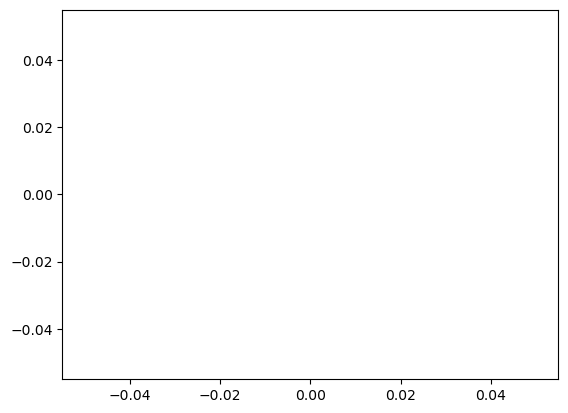

In [177]:
x = np.linspace(0, 2)
y = x**2
figura = plt.figure()
ax = figura.add_subplot(1,1,1)
ax.plot()

#### multiples subplots

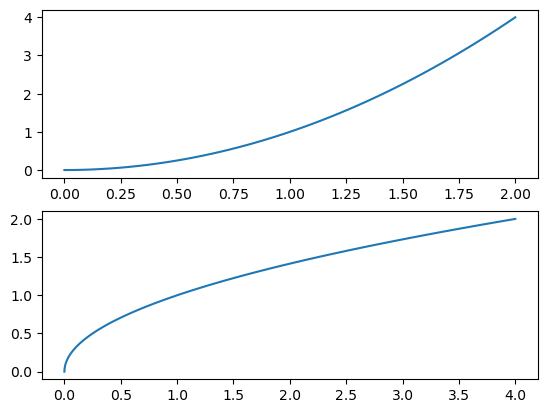

In [178]:
filas = 2
columnas = 1
figura, ejes = plt.subplots(filas, columnas)
ejes[0].plot(x, y)
ejes[1].plot(y, x)

### Título y etiquetas

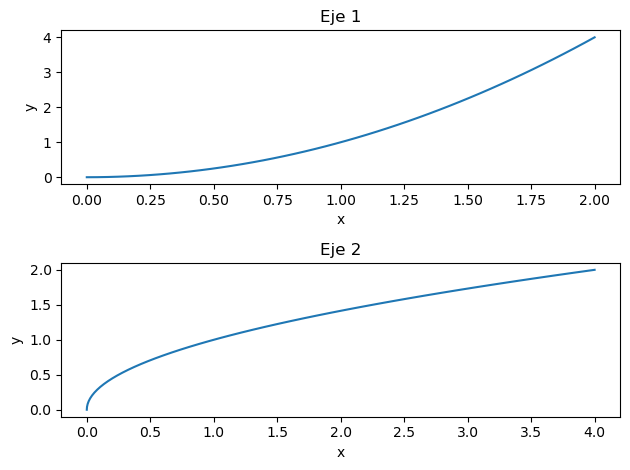

In [179]:
ejes[0].set_title('Eje 1')
ejes[1].set_title('Eje 2')
[(ax.set_xlabel('x')) for ax in ejes]
[(ax.set_ylabel('y')) for ax in ejes]
figura.tight_layout()
figura

### Cuadriculas

#### Cuadriculas simples

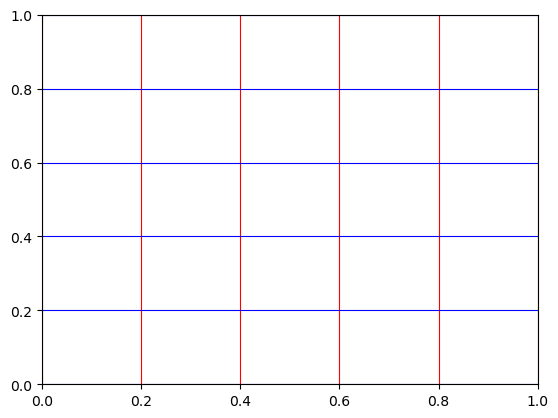

In [180]:
figura2 = plt.figure()
ax = figura2.add_subplot(1,1,1)
ax.xaxis.grid(color='r', linestyle='-')
ax.yaxis.grid(color='b', linestyle='-')


#### Cuadriculas menores

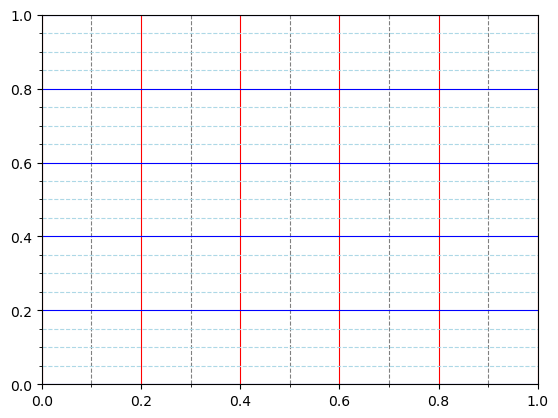

In [181]:
ax.xaxis.set_minor_locator(plt.MultipleLocator(0.1))
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.05))
ax.xaxis.grid(which='minor', color='grey', linestyle='dashed')
ax.yaxis.grid(which='minor', color='lightblue', linestyle='dashed')
figura2

### Graficas

#### Función cuadrática

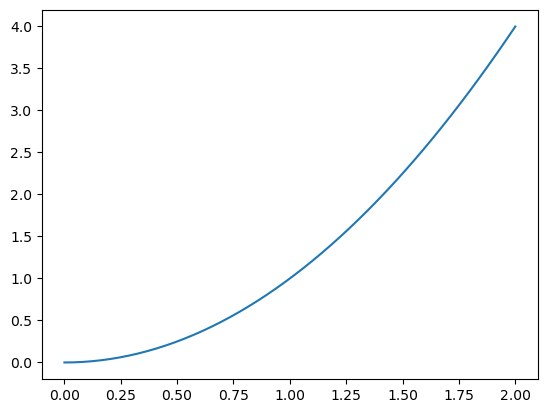

In [182]:
x = np.linspace(0, 2)
y = x**2
plt.plot(x, y)
plt.show()

#### Varias funciones

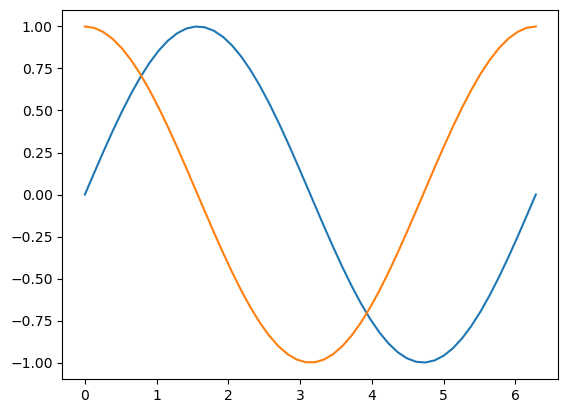

In [183]:
x = np.linspace(0, 2 * np.pi)
sin = np.sin(x)
cos = np.cos(x)
figura , ejes = plt.subplots()
ejes.plot(x, sin)
ejes.plot(x, cos)

#### Con estilos

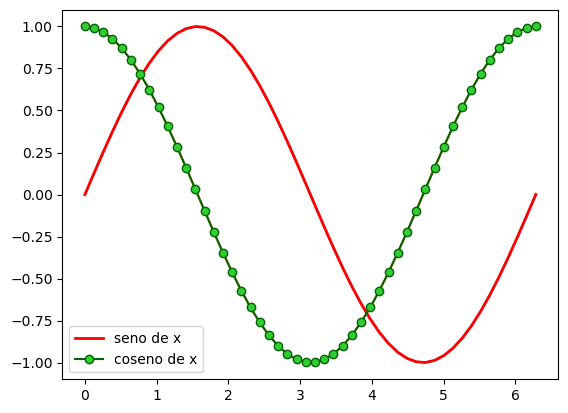

In [184]:

ejes.plot(x, sin, label='seno de x', linewidth=2, color='r')
ejes.plot(x, cos, label='coseno de x', marker="o", markerfacecolor="limegreen",color='darkgreen')
ejes.legend()
figura

#### Limites

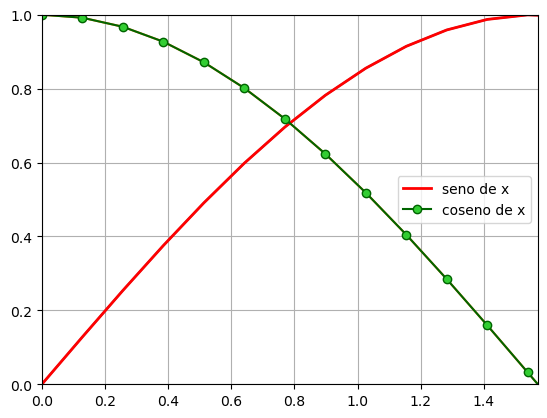

In [185]:
ejes.set_xlim(0, np.pi/2)
ejes.set_ylim(0, 1)
ejes.grid()
figura

#### Anotaciones

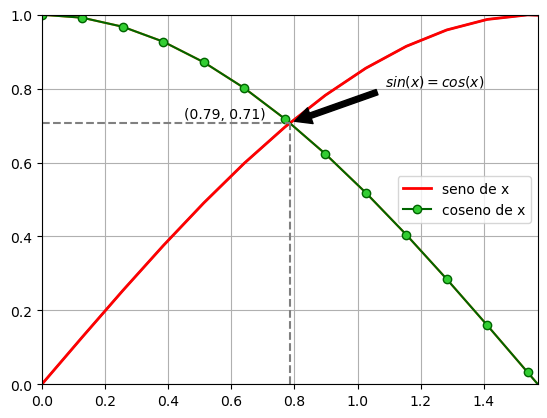

In [186]:
xsol = np.pi / 4 + np.pi * 0
ysol = np.sin(xsol)

ejes.annotate('$sin(x) = cos(x)$', xy=(xsol,ysol),
              xytext=(xsol+0.3,ysol+0.1), arrowprops=dict(facecolor='black', shrink=0.05))
ejes.text(0.45, 0.72, f'({xsol:.2f}, {ysol:.2f})')
ejes.plot([xsol,xsol], [0,ysol], color='grey', linestyle='--')
ejes.plot([0,xsol], [ysol,ysol], color='grey', linestyle='--')
figura

### Gráfico de barras

#### Cargar dataset

In [187]:
# URL del dataset https://www.kaggle.com/datasets/arjunprasadsarkhel/2021-olympics-in-tokyo?select=Medals.xlsx
# URL de descarga https://www.kaggle.com/datasets/arjunprasadsarkhel/2021-olympics-in-tokyo/download?datasetVersionNumber=7

medals_data = pd.read_excel("dataset_olimpiadas/Medals.xlsx")
medals_data


c:\Users\brais.fernandezvazqu\Miniconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


Rank                    Team/NOC  Gold  Silver  Bronze  Total  \
0      1    United States of America    39      41      33    113   
1      2  People's Republic of China    38      32      18     88   
2      3                       Japan    27      14      17     58   
3      4               Great Britain    22      21      22     65   
4      5                         ROC    20      28      23     71   
..   ...                         ...   ...     ...     ...    ...   
88    86                       Ghana     0       0       1      1   
89    86                     Grenada     0       0       1      1   
90    86                      Kuwait     0       0       1      1   
91    86         Republic of Moldova     0       0       1      1   
92    86        Syrian Arab Republic     0       0       1      1   

    Rank by Total  
0               1  
1               2  
2               5  
3               4  
4               3  
..            ...  
88             77  
89             77  
90             77  
91             77  
92             77  

[93 rows x 7 columns]

In [188]:
print(medals_data.describe())
print(medals_data.info())

            Rank       Gold     Silver     Bronze       Total  Rank by Total
count  93.000000  93.000000  93.000000  93.000000   93.000000      93.000000
mean   46.333333   3.655914   3.634409   4.322581   11.612903      43.494624
std    26.219116   7.022471   6.626339   6.210372   19.091332      24.171769
min     1.000000   0.000000   0.000000   0.000000    1.000000       1.000000
25%    24.000000   0.000000   0.000000   1.000000    2.000000      23.000000
50%    46.000000   1.000000   1.000000   2.000000    4.000000      47.000000
75%    70.000000   3.000000   4.000000   5.000000   11.000000      66.000000
max    86.000000  39.000000  41.000000  33.000000  113.000000      77.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rank           93 non-null     int64 
 1   Team/NOC       93 non-null     object
 2   Gold           93 non-null  

#### Modify data

In [189]:
medals_data = medals_data.rename(columns={"Team/NOC": "Country"})
medals_data = medals_data.set_index("Country")
medals_data

Rank  Gold  Silver  Bronze  Total  Rank by Total
Country                                                                     
United States of America       1    39      41      33    113              1
People's Republic of China     2    38      32      18     88              2
Japan                          3    27      14      17     58              5
Great Britain                  4    22      21      22     65              4
ROC                            5    20      28      23     71              3
...                          ...   ...     ...     ...    ...            ...
Ghana                         86     0       0       1      1             77
Grenada                       86     0       0       1      1             77
Kuwait                        86     0       0       1      1             77
Republic of Moldova           86     0       0       1      1             77
Syrian Arab Republic          86     0       0       1      1             77

[93 rows x 6 columns]

#### Get first 10

In [190]:

mejores = medals_data.sort_values(by="Rank").head(10)
mejores

Rank  Gold  Silver  Bronze  Total  Rank by Total
Country                                                                     
United States of America       1    39      41      33    113              1
People's Republic of China     2    38      32      18     88              2
Japan                          3    27      14      17     58              5
Great Britain                  4    22      21      22     65              4
ROC                            5    20      28      23     71              3
Australia                      6    17       7      22     46              6
Netherlands                    7    10      12      14     36              9
France                         8    10      12      11     33             10
Germany                        9    10      11      16     37              8
Italy                         10    10      10      20     40              7

#### Set View

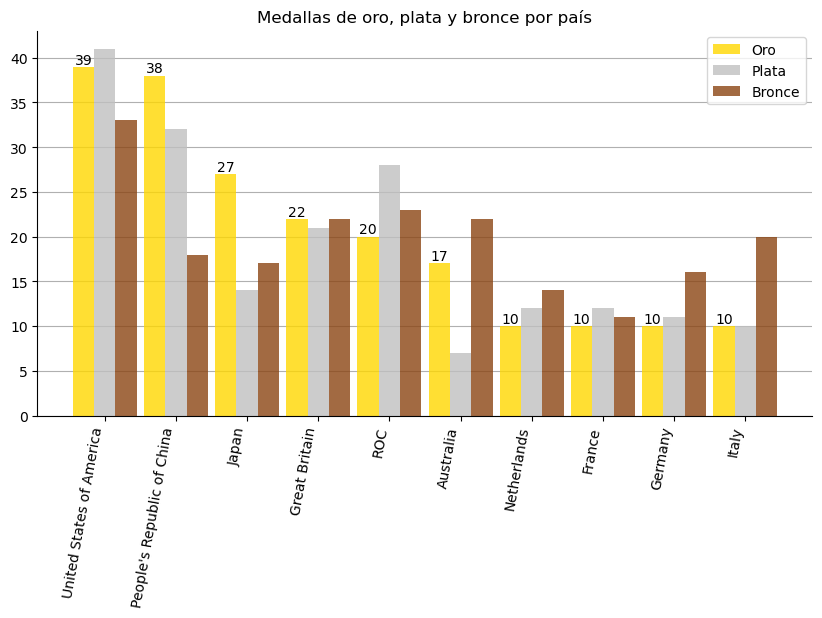

In [191]:
figura, ejes = plt.subplots(figsize=(10, 5))
ancho_barras = 9/30
bar_alpha = 0.8
bar_zorder = 2
eje_x = mejores["Rank"]
# set zorder to 1 to draw the bars on top of the grid lines
ejes.yaxis.grid()
ejes.bar(
    x = eje_x - ancho_barras,
    height = mejores["Gold"],
    width = ancho_barras,
    label="Oro",
    color="gold",
    zorder=bar_zorder,
    alpha=bar_alpha,
)
ejes.bar(
    x = eje_x,
    height = mejores["Silver"],
    width = ancho_barras,
    label="Plata",
    color="silver",
    zorder=bar_zorder,
    alpha=bar_alpha
)
ejes.bar(
    x = eje_x + ancho_barras,
    height = mejores["Bronze"],
    width = ancho_barras,
    label="Bronce",
    color="saddlebrown",
    zorder=bar_zorder,
    alpha=bar_alpha
)

ejes.bar_label(ejes.containers[0])
ejes.spines["right"].set_visible(False)
ejes.spines["top"].set_visible(False)
ejes.set_xticks(eje_x)
ejes.set_xticklabels(mejores.index, rotation=80, ha="right")
ejes.set_title("Medallas de oro, plata y bronce por país")
ejes.legend()


### Tiobe index

#### Cargar dataset

In [192]:
df = pd.read_csv('./dataset_tiobe/tiobe2020.csv', index_col=0, parse_dates=True)
df

ID  Jan 2021  Jan 2020  Programming Language Ratings Annual Change
0    1         1         2                     C  17.38%        +1.61%
1    2         2         1                  Java  11.96%        -4.93%
2    3         3         3                Python  11.72%        +2.01%
3    4         4         4                   C++   7.56%        +1.99%
4    5         5         5                    C#   3.95%        -1.40%
5    6         6         6          Visual Basic   3.84%        -1.44%
6    7         7         7            JavaScript   2.20%        -0.25%
7    8         8         8                   PHP   1.99%        -0.41%
8    9         9        18                     R   1.90%        +1.10%
9   10        10        23                Groovy   1.84%        +1.23%
10  11        11        15     Assembly language   1.64%        +0.76%
11  12        12        10                   SQL   1.61%        +0.10%
12  13        13         9                 Swift   1.43%        -0.36%
13  14        14        14                    Go   1.41%        +0.51%
14  15        15        11                  Ruby   1.30%        +0.24%
15  16        16        20                MATLAB   1.15%        +0.41%
16  17        17        19                  Perl   1.02%        +0.27%
17  18        18        13           Objective-C   1.00%        +0.07%
18  19        19        12  Delphi/Object Pascal   0.79%        -0.20%
19  20        20        16  Classic Visual Basic   0.79%        -0.04%

#### Modify data

In [193]:
df = df[["Programming Language", "Ratings"]]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Programming Language  20 non-null     object
 1   Ratings               20 non-null     object
dtypes: object(2)
memory usage: 480.0+ bytes


In [194]:
df["Ratings"] = df["Ratings"].str.replace("%","").astype(float)
df = df.sort_values(by="Ratings", ascending=False)
df

C:\Users\brais.fernandezvazqu\AppData\Local\Temp\ipykernel_1444\3322247384.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Ratings"] = df["Ratings"].str.replace("%","").astype(float)


Programming Language  Ratings
0                      C    17.38
1                   Java    11.96
2                 Python    11.72
3                    C++     7.56
4                     C#     3.95
5           Visual Basic     3.84
6             JavaScript     2.20
7                    PHP     1.99
8                      R     1.90
9                 Groovy     1.84
10     Assembly language     1.64
11                   SQL     1.61
12                 Swift     1.43
13                    Go     1.41
14                  Ruby     1.30
15                MATLAB     1.15
16                  Perl     1.02
17           Objective-C     1.00
18  Delphi/Object Pascal     0.79
19  Classic Visual Basic     0.79

#### Create plot

Text(0.5, 1.0, 'Lenguajes de programación más populares en 2020')

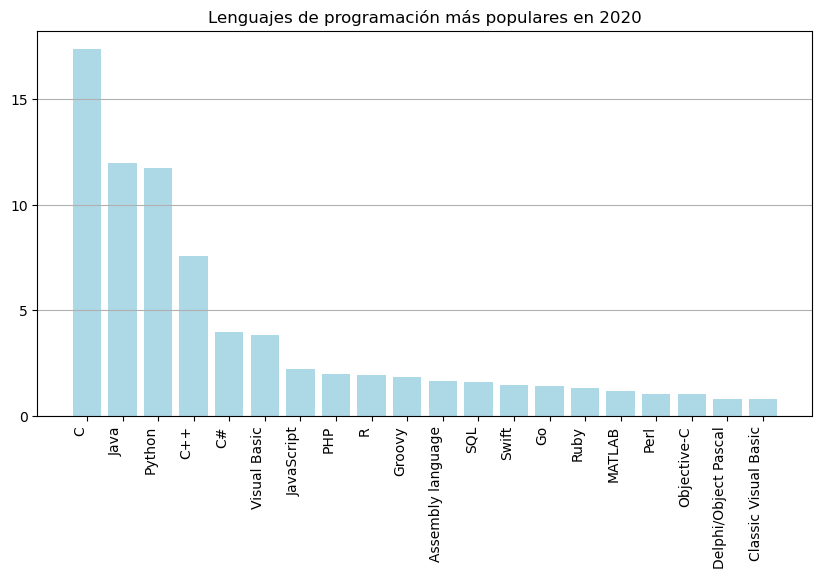

In [195]:
figura, ejes = plt.subplots(figsize=(10, 5))
ejes.bar(df.index, df["Ratings"], color="lightblue")
ejes.yaxis.grid()
ejes.set_xticks(df.index)
ejes.set_xticklabels(df["Programming Language"], rotation=90, ha="right")
ejes.set_yticks([0,5,10,15])
ejes.yaxis.set_label("Porcentaje de uso")
ejes.yaxis.set_label_position("right")
ejes.set_title("Lenguajes de programación más populares en 2020")


### Animaciones

#### Imports

In [196]:
from matplotlib import animation
from matplotlib import rc

rc("animation", html="jshtml") # html5

#### Subplots

(-2.0, 2.0)

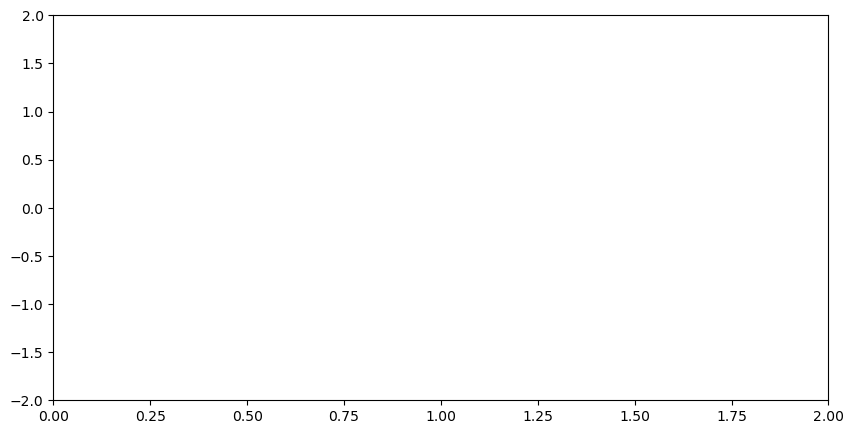

In [197]:
figura, ejes = plt.subplots(figsize=(10, 5))
ejes.set_xlim(0, 2)
ejes.set_ylim(-2,2)

#### Set Title

In [198]:
titulo = ejes.set_title("hola")


#### Funcion a dibujar

In [199]:
def dibujar(frame):
    titulo.set_text(f"Hola {frame}")
    x = np.linspace(0, 2, 3000)
    y = np.sin(2*np.pi*(x+0.01*frame))
    l1.set_data(x, y)

    return l1,


l1, =ejes.plot([0], [0], "lime")

animacion = animation.FuncAnimation(
    figura,
    dibujar,
    frames=101,
    interval=22,
)
animacion

### Grafico de dispersion

#### Leer datos

In [200]:
# origen https://www.kaggle.com/datasets/justinas/nba-players-data
df = pd.read_csv("dataset_temporadas/all_seasons.csv", usecols=["pts","reb","ast"])
print(df.head())
df.shape


   pts   reb  ast
0  5.7  16.1  3.1
1  2.3   1.5  0.3
2  0.8   1.0  0.4
3  3.7   2.3  0.6
4  2.4   2.4  0.2


(12305, 3)

#### Crear graficos

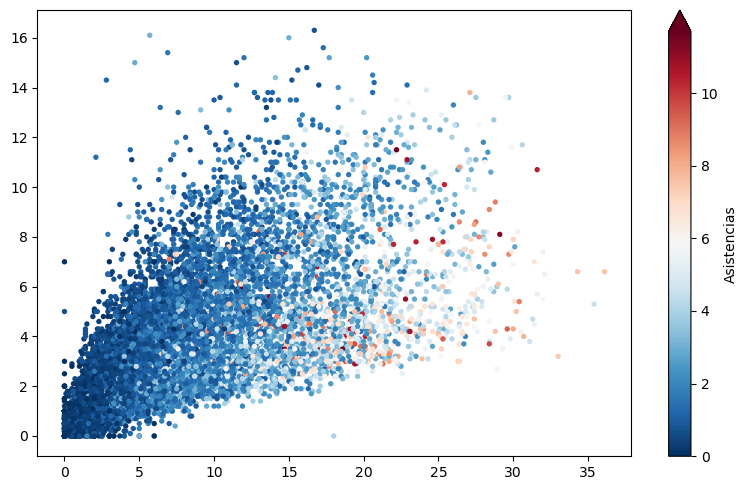

In [201]:
figura, ejes = plt.subplots(figsize=(8, 5))
x = df.pts
y = df.reb
colors = df.ast
grafico =ejes.scatter(
    x, y,
    15,
    c=colors,
    cmap="RdBu_r", # viridis
    vmin=colors.min(),
    vmax=colors.max(),
    alpha=1,
    edgecolors='none',
    )  
barra_de_color = figura.colorbar(grafico, ax=ejes, label="Asistencias", extend="max")
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
figura.tight_layout()


### histogramas

#### Cargar datos

In [212]:
# origen https://www.kaggle.com/datasets/mysarahmadbhat/avengers-marvel
df = pd.read_csv("dataset_avengers/avengers.csv", encoding="ISO-8859-1", usecols=["Year"])
df.head()

Year
0  1963
1  1963
2  1963
3  1963
4  1963

In [213]:
mask =df["Year"]>= 1965
df = df[mask]
bins = range(df['Year'].min(), df["Year"].max(),5)
print(df, bins)

     Year
7    1965
8    1965
9    1965
10   1965
11   1967
..    ...
168  2013
169  2014
170  2014
171  2014
172  2015

[152 rows x 1 columns] range(1965, 2015, 5)


#### Crear vista

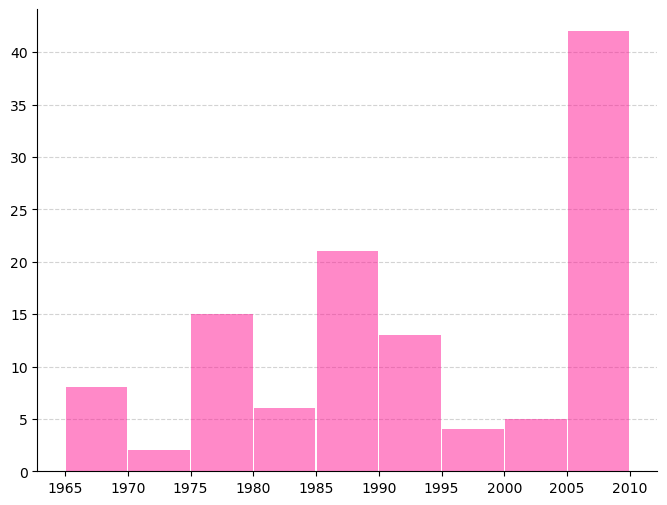

In [221]:
figura, ejes = plt.subplots(figsize=(8, 6))
ejes.yaxis.grid(color="lightgray", linestyle="--")
ejes.hist(df["Year"], bins=bins, color="deeppink", rwidth=0.98, alpha=0.5,zorder=2,)
ejes.set_xticks(bins) 
ejes.spines["right"].set_visible(False)
ejes.spines["top"].set_visible(False)